<a href="https://colab.research.google.com/github/antonioacunab/challenge-telecom-x-parte-2/blob/main/TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📡 Telecom X - Parte 2

##📣 Historia del Desafío

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

##🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios. La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

##🧠 Objetivos del Desafío

- Preparar los datos para el modelado (tratamiento, codificación, normalización).
- Realizar análisis de correlación y selección de variables.
- Entrenar dos o más modelos de clasificación.
- Evaluar el rendimiento de los modelos con métricas.
- Interpretar los resultados, incluyendo la importancia de las variables.
- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

🧰 Lo que vas a practicar

- ✅ Preprocesamiento de datos para Machine Learning
- ✅ Construcción y evaluación de modelos predictivos
- ✅ Interpretación de resultados y entrega de insights
- ✅ Comunicación técnica con enfoque estratégico

🚀 Ahora eres: Analista Junior de Machine Learning

Telecom X confía en tu entrega para dar los próximos pasos hacia una solución de inteligencia predictiva eficaz. ¡Buena suerte!

##📁 Extracción de los datos

In [303]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

url = "https://raw.githubusercontent.com/antonioacunab/challenge-telecom-x-parte-2/refs/heads/main/datos_tratados.csv"

df_raw = pd.read_csv(url)

df_raw.head()

,customerID,Churn,Gender,SeniorCitizen,HasPartner,HasDependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DailyCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


##🛠️ Tratamiento de los datos

In [304]:
# Eliminamos las columnas que no son relevantes para el estudio, por el momento la única de la que tenemos certeza es "customerID"

df_raw = df_raw.drop(columns=["customerID"], axis = 1)

# Crearemos un nuevo dataframe donde almacenaremos los datos con un procesado de limpieza adicional
df = df_raw.copy()

# Estas columnas son categóricas y su valor puede ser "Yes", "No" o "No internet service" (Que también se podría tratar como "No")
cols_to_fix = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

# Reemplazamos los valores que son "No internet service" por "No"
for col in cols_to_fix:
  df[col] = df[col].replace("No internet service", "No")

# Estas columnas son categóricas y su valor puede ser "Yes", "No" o "No phone service" (Que también se podría tratar como "No")
cols_to_fix = ["MultipleLines"]

# Reemplazamos los valores que son "No phone service" por "No"
for col in cols_to_fix:
  df[col] = df[col].replace("No phone service", "No")

df["MonthToMonth"] = df["Contract"] == "Month-to-month"
df["OneYear"] = df["Contract"] == "One year"
df["TwoYear"] = df["Contract"] == "Two year"

df.drop(columns=["Contract"], axis = 1, inplace = True)

columnas_categoricas = list(df.select_dtypes(include="object").columns)

df_encoded = pd.get_dummies(df, columns = columnas_categoricas, drop_first=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   DailyCharges                           7043 non-null   float64
 5   MonthToMonth                           7043 non-null   bool   
 6   OneYear                                7043 non-null   bool   
 7   TwoYear                                7043 non-null   bool   
 8   Churn_Yes                              7043 non-null   bool   
 9   Gender_Male                            7043 non-null   bool   
 10  HasPartner_Yes                         7043 non-null   bool   
 11  HasD

In [305]:
df_encoded.isnull().sum()

,0
SeniorCitizen,0
Tenure,0
MonthlyCharges,0
TotalCharges,11
DailyCharges,0
MonthToMonth,0
OneYear,0
TwoYear,0
Churn_Yes,0
Gender_Male,0


In [306]:
# Encontramos que habían valores nulos, podemos decidir entre asignarles un valor o eliminarlos.
# Dado que son muy poca cantidad con respecto a la cantidad total de muestras, en esta ocasión se decidió eliminarlos
df_encoded = df_encoded.dropna()

df_encoded.isnull().sum()

,0
SeniorCitizen,0
Tenure,0
MonthlyCharges,0
TotalCharges,0
DailyCharges,0
MonthToMonth,0
OneYear,0
TwoYear,0
Churn_Yes,0
Gender_Male,0


In [307]:
df_encoded.columns

Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'DailyCharges', 'MonthToMonth', 'OneYear', 'TwoYear', 'Churn_Yes',
       'Gender_Male', 'HasPartner_Yes', 'HasDependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [308]:
df_encoded.rename(columns={"Churn_Yes": "Churn",
                          "SeniorCitizen": "SeniorCitizen",
                          "Tenure": "Tenure",
                          "MonthlyCharges": "MonthlyCharges",
                          "TotalCharges": "TotalCharges",
                          "DailyCharges": "DailyCharges",
                          "Gender_Male": "GenderMale",
                          "HasPartner_Yes": "HasPartner",
                          "HasDependents_Yes": "HasDependents",
                          "PhoneService_Yes": "PhoneService",
                          "MultipleLines_Yes": "MultipleLines",
                          "InternetService_Fiber optic": "IsFiberOptic",
                          "InternetService_No": "HasInternetService",
                          "OnlineSecurity_Yes": "OnlineSecurity",
                          "OnlineBackup_Yes": "OnlineBackup",
                          "DeviceProtection_Yes": "DeviceProtection",
                          "TechSupport_Yes": "TechSupport",
                          "StreamingTV_Yes": "StreamingTV",
                          "StreamingMovies_Yes": "StreamingMovies",
                          "MonthToMonth": "MonthToMonth",
                          "OneYear": "OneYear",
                          "TwoYear": "TwoYear",
                          "PaperlessBilling_Yes": "PaperlessBilling",
                          "PaymentMethod_Credit card (automatic)": "PaymentMethodCreditCard",
                          "PaymentMethod_Electronic check": "PaymentMethodElectronicCheck",
                          "PaymentMethod_Mailed check": "PaymentMethodMailedCheck"
                          }, inplace = True)

df_encoded.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,DailyCharges,MonthToMonth,OneYear,TwoYear,Churn,GenderMale,HasPartner,HasDependents,PhoneService,MultipleLines,IsFiberOptic,HasInternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethodCreditCard,PaymentMethodElectronicCheck,PaymentMethodMailedCheck
0,0,9,65.6,593.30,2.186667,False,True,False,False,False,True,True,True,False,False,False,False,True,False,True,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True
2,0,4,73.9,280.85,2.463333,True,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,True,False,False,True,True,True,False,True,False,True,False,False,True,True,False,True,True,True,False,True,False
4,1,3,83.9,267.40,2.796667,True,False,False,True,False,True,False,True,False,True,False,False,False,False,True,True,False,True,False,False,True


### Separación de Datos

In [309]:
# --- 1. Definir variable objetivo (y) y predictoras (X) ---
# Usamos el nuevo nombre de columna 'Churn'
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# --- 2. División y Balanceo de Datos ---
# Dividimos los datos de manera estratificada
# Hacemos este paso antes del SMOTE para evitar alterar los datos de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Aplicamos SMOTE solo en el conjunto de entrenamiento
print("Balanceando el conjunto de entrenamiento con SMOTE...")
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\n--- Terminamos el balanceo ---")
print("Distribución ANTES de SMOTE:", y_train.value_counts().to_dict())
print("Distribución DESPUÉS de SMOTE:", y_train_res.value_counts().to_dict())

print("\nDimensiones de los conjuntos de datos:")
print(f"X_train (original): {X_train.shape}")
print(f"X_train_res (balanceado): {X_train_res.shape}")
print(f"X_test: {X_test.shape}")

Balanceando el conjunto de entrenamiento con SMOTE...

--- Terminamos el balanceo ---
Distribución ANTES de SMOTE: {False: 3614, True: 1308}
Distribución DESPUÉS de SMOTE: {True: 3614, False: 3614}

Dimensiones de los conjuntos de datos:
X_train (original): (4922, 25)
X_train_res (balanceado): (7228, 25)
X_test: (2110, 25)


In [310]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [311]:
from sklearn.preprocessing import StandardScaler

# 1. Crear una instancia del estandarizador
scaler = StandardScaler()

# 2. Ajustar el estandarizador SOLO con los datos de entrenamiento y luego transformarlos
#    Esta es la variable que usaremos para entrenar la Regresión Logística
X_train_scaled = scaler.fit_transform(X_train_res)

# 3. Usar el estandarizador YA AJUSTADO para transformar los datos de prueba
#    Esta es la variable que usaremos para evaluar el modelo
X_test_scaled = scaler.transform(X_test)

# --- Verificación (Opcional) ---
print("¡Estandarización completada! ✅")
print(f"Dimensiones de X_train_scaled: {X_train_scaled.shape}")
print(f"Dimensiones de X_test_scaled: {X_test_scaled.shape}")

¡Estandarización completada! ✅
Dimensiones de X_train_scaled: (7228, 25)
Dimensiones de X_test_scaled: (2110, 25)


### Transformaciones realizadas
Hasta este punto, se hicieron las siguientes modificaciones al conjunto de datos que teníamos originalmente:

- Se eliminó la columna customerID
- Se tomaron las columnas relativas al servicio de Internet, y en aquellas filas donde tenían el valor “No internet service” se cambió por “No”
- Se tomaron las columnas relativas al servicio de teléfono, y en aquellas filas donde tenían el valor “No phone service” se cambió por “No”
- Se usó la columna `Contract` para crear tres columnas booleanas, una por cada tipo de contrato, y se eliminó la columna original.
- Se tomaron todas las columnas categóricas y se codificaron con la función get_dummies
- Se renombraron las columnas
- Se eliminaron las filas con valores nulos (11 registros que tenían NaN en la columna de TotalCharges)
- Dividimos el dataset en datos de entrenamiento y prueba para poder aplicar balanceo en los datos de entrenamiento
- Normalizamos columnas en los datos de entrenamiento y prueba


### Proporción de Cancelación de los clientes

In [312]:
# Verificamos la proporción de cancelación de clientes

proporcion_churn = df_encoded.Churn.value_counts(normalize=True)

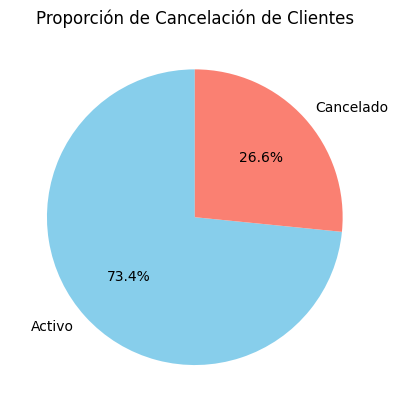

In [313]:
plt.pie(proporcion_churn, labels=["Activo", "Cancelado"], startangle=90, autopct='%1.1f%%', colors=["skyblue", "salmon"])
plt.title('Proporción de Cancelación de Clientes')

plt.show()

##⏪ Correlación y selección de variables

In [314]:
corr = df_encoded.corr()

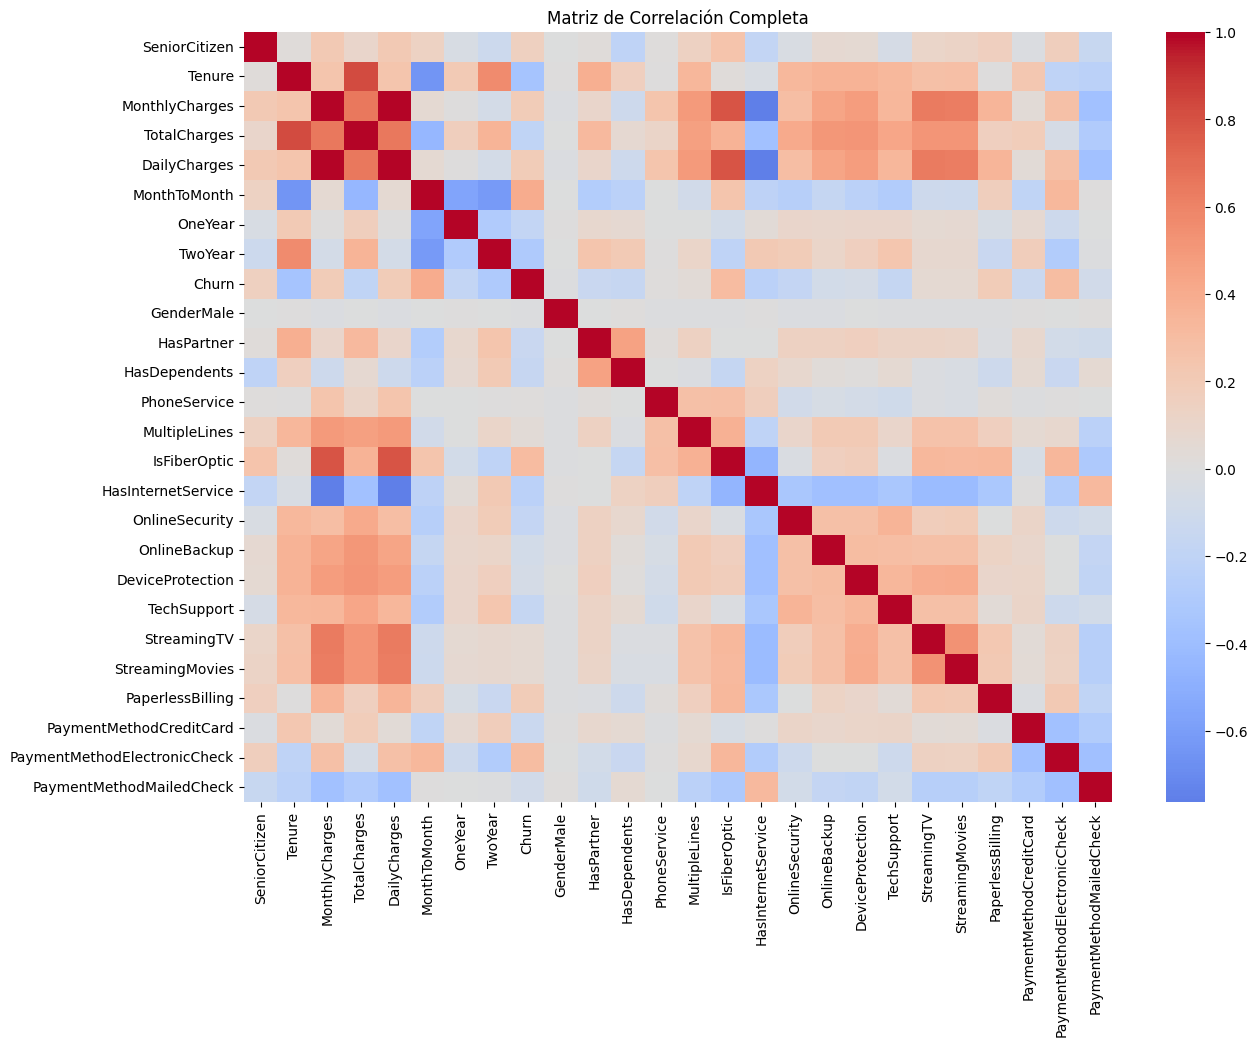

In [315]:
# ===== 1. Mapa de calor de todas las correlaciones =====
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Matriz de Correlación Completa")
plt.show()

/tmp/ipython-input-1000237768.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_churn, y=corr_churn.index, palette="coolwarm")


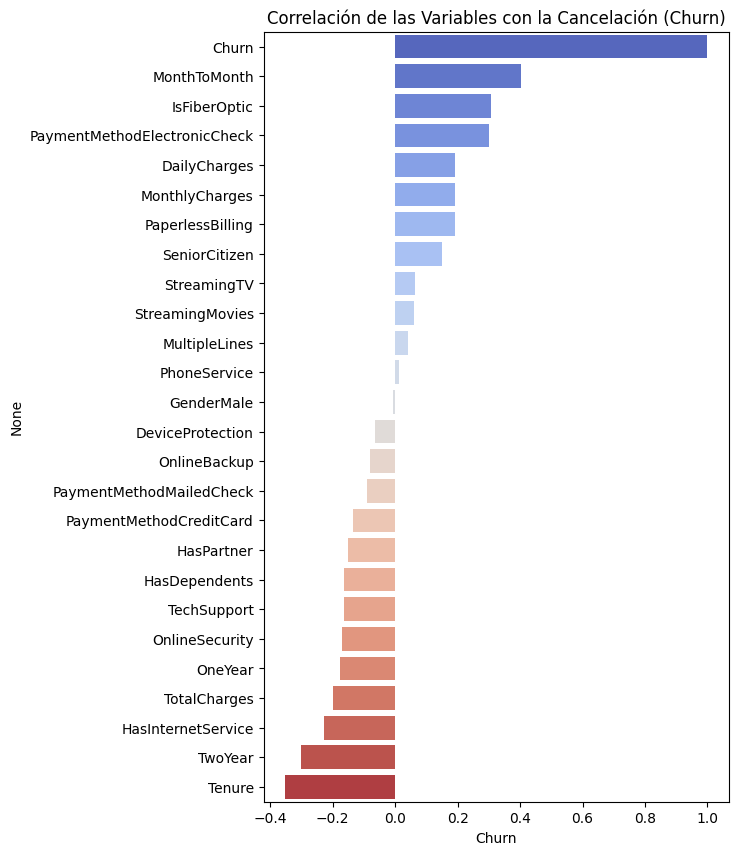

In [316]:
# ===== 2. Correlación con la variable objetivo (Churn) =====
corr_churn = corr["Churn"].sort_values(ascending=False)

plt.figure(figsize=(6,10))
sns.barplot(x=corr_churn, y=corr_churn.index, palette="coolwarm")
plt.title("Correlación de las Variables con la Cancelación (Churn)")
plt.show()

In [317]:
# Estos son los valores exactos de las correlaciones con "Churn"
print("Correlaciones con Churn:\n")
print(corr_churn)

Correlaciones con Churn:

Churn                           1.000000
MonthToMonth                    0.404565
IsFiberOptic                    0.307463
PaymentMethodElectronicCheck    0.301455
DailyCharges                    0.192858
MonthlyCharges                  0.192858
PaperlessBilling                0.191454
SeniorCitizen                   0.150541
StreamingTV                     0.063254
StreamingMovies                 0.060860
MultipleLines                   0.040033
PhoneService                    0.011691
GenderMale                     -0.008545
DeviceProtection               -0.066193
OnlineBackup                   -0.082307
PaymentMethodMailedCheck       -0.090773
PaymentMethodCreditCard        -0.134687
HasPartner                     -0.149982
HasDependents                  -0.163128
TechSupport                    -0.164716
OnlineSecurity                 -0.171270
OneYear                        -0.178225
TotalCharges                   -0.199484
HasInternetService             

### Análisis dirigido

/tmp/ipython-input-2429026799.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="Tenure", data=df_encoded, palette="Set2")


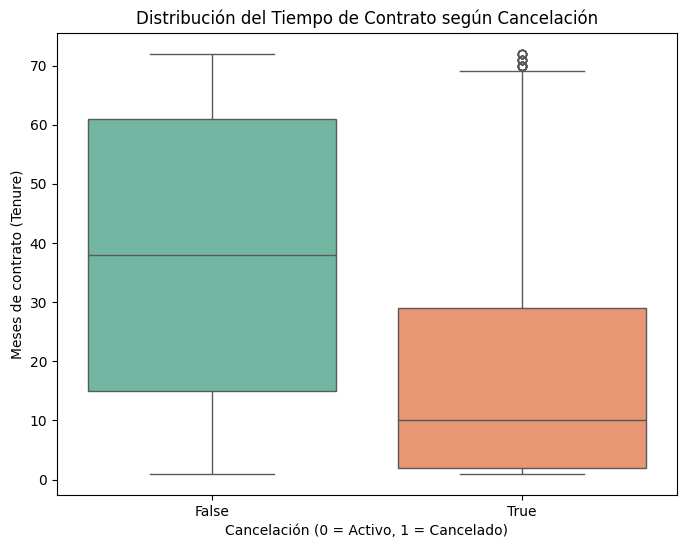

In [318]:
# ===== Tiempo de contrato (Tenure) × Cancelación =====
plt.figure(figsize=(8,6))
sns.boxplot(x="Churn", y="Tenure", data=df_encoded, palette="Set2")
plt.title("Distribución del Tiempo de Contrato según Cancelación")
plt.xlabel("Cancelación (0 = Activo, 1 = Cancelado)")
plt.ylabel("Meses de contrato (Tenure)")
plt.show()

/tmp/ipython-input-3083630437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="TotalCharges", data=df_encoded, palette="Set2")


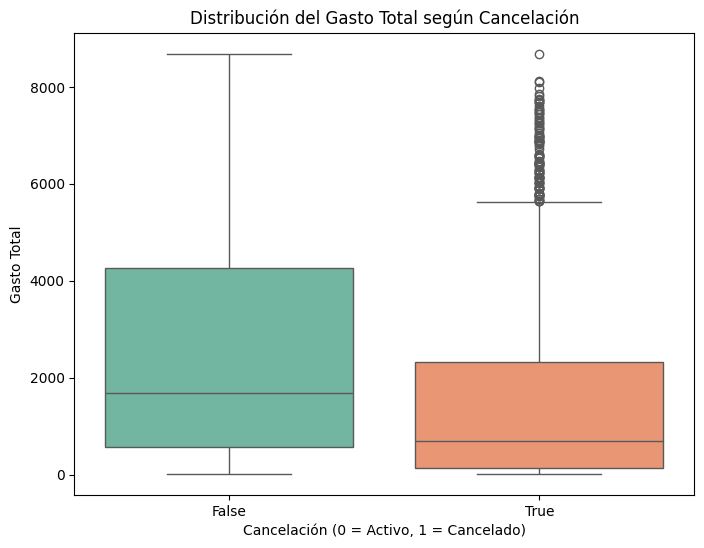

In [319]:
# ===== Gasto total (TotalCharges) × Cancelación =====
plt.figure(figsize=(8,6))
sns.boxplot(x="Churn", y="TotalCharges", data=df_encoded, palette="Set2")
plt.title("Distribución del Gasto Total según Cancelación")
plt.xlabel("Cancelación (0 = Activo, 1 = Cancelado)")
plt.ylabel("Gasto Total")
plt.show()

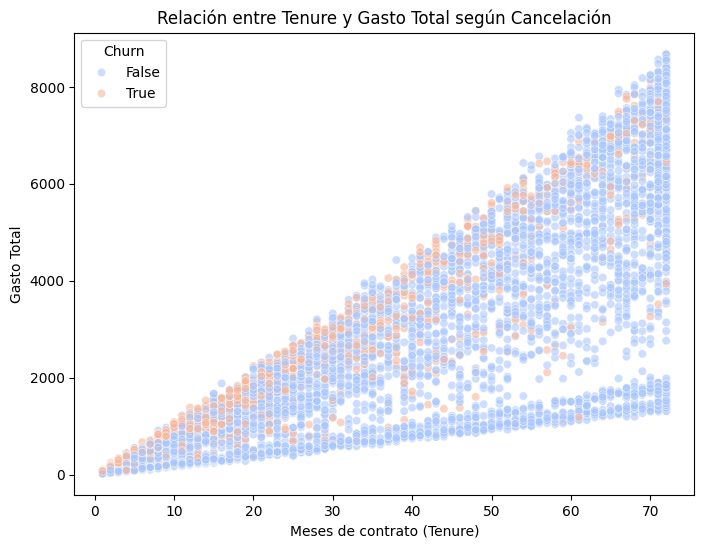

In [320]:
# ===== Scatter plot para ver patrón continuo =====
plt.figure(figsize=(8,6))
sns.scatterplot(x="Tenure", y="TotalCharges", hue="Churn", data=df_encoded, alpha=0.6, palette="coolwarm")
plt.title("Relación entre Tenure y Gasto Total según Cancelación")
plt.xlabel("Meses de contrato (Tenure)")
plt.ylabel("Gasto Total")
plt.show()

## Creación de Modelos

In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Instanciar y entrenar el modelo con los datos escalados
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train_res)

# 2. Realizar predicciones sobre los datos de prueba escalados
y_pred_log_reg = log_reg.predict(X_test_scaled)

# 3. Evaluar el modelo
print("### Resultados: Regresión Logística ###")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_log_reg))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_log_reg))

### Resultados: Regresión Logística ###

Matriz de Confusión:
[[1291  258]
 [ 209  352]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.86      0.83      0.85      1549
        True       0.58      0.63      0.60       561

    accuracy                           0.78      2110
   macro avg       0.72      0.73      0.72      2110
weighted avg       0.79      0.78      0.78      2110



In [322]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instanciar y entrenar el modelo con los datos balanceados (no escalados)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_res, y_train_res)

# 2. Realizar predicciones sobre los datos de prueba originales (no escalados)
y_pred_rf = rf_clf.predict(X_test)

# 3. Evaluar el modelo
print("### Resultados: Random Forest ###")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

### Resultados: Random Forest ###

Matriz de Confusión:
[[1326  223]
 [ 239  322]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.85      0.86      0.85      1549
        True       0.59      0.57      0.58       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



In [323]:
# =======================
# Modelo 2: Random Forest (sin normalización)
# =======================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))


=== Random Forest ===
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1549
        True       0.63      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110

Matriz de confusión:
 [[1389  160]
 [ 289  272]]


### Comparativa Detallada

Podemos ver los siguientes datos de los dos modelos
1. Accuracy (Precisión Global)
  - Random Forest: 81%
  - Regresión Logística: 75%
  - En este apartado el Random Forest acierta más en sus predicciones generales (tanto para los que se quedan como para los que se van). Sin embargo, no todo puede ser dicho con la precisión, sobre todo en casos como este que hay un desbalanceo.

2. Recall (Sensibilidad para "Churn")
  - Regresión Logística: 0.76 (76%)
  - Random Forest: 0.58 (58%)
  - En este apartado la regresión logística ofrece mejores resultados, ya que logró identificar al 76% de los clientes que estaban a punto de cancelar. El Random Forest, en cambio, solo encontró al 58%, dejando escapar a casi la mitad de los clientes en riesgo. En un escenario real, esto significa que el primer modelo te da la oportunidad de retener a muchos más clientes.

3. Precision (Precisión para "Churn")
  - Random Forest: 0.68 (68%)
  - Regresión Logística: 0.52 (52%)
  - En este apartado, el Random Forest es más certero en sus alertas. Cuando te dice que un cliente va a cancelar, tiene razón el 68% de las veces. La Regresión Logística es menos precisa; casi la mitad de sus alertas son "falsas alarmas" (clientes que no iban a cancelar).


/tmp/ipython-input-3663857421.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')


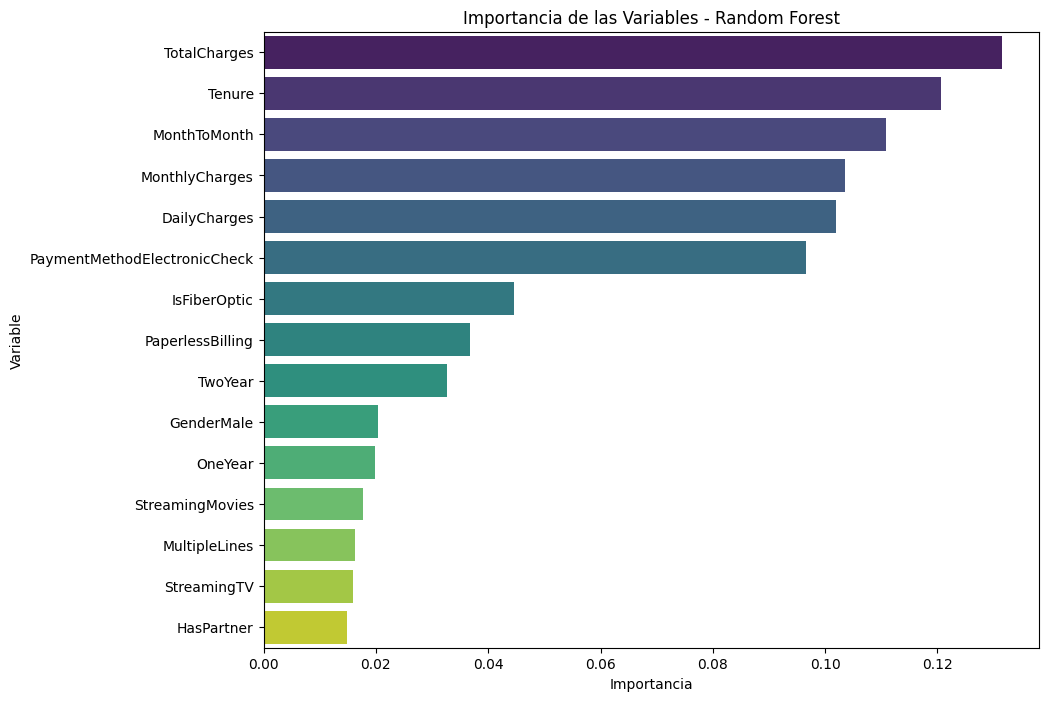

Top 10 variables más importantes según Random Forest:
                         Feature  Importance
3                   TotalCharges    0.131422
1                         Tenure    0.120683
5                   MonthToMonth    0.110800
2                 MonthlyCharges    0.103608
4                   DailyCharges    0.101847
23  PaymentMethodElectronicCheck    0.096615
13                  IsFiberOptic    0.044584
21              PaperlessBilling    0.036796
7                        TwoYear    0.032631
8                     GenderMale    0.020334


In [324]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extraer la importancia de las variables del modelo entrenado (rf_clf)
importances = rf_clf.feature_importances_

# Crear un DataFrame para una fácil visualización
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizar las 15 variables más importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Importancia de las Variables - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

# Imprimir el top 10
print("Top 10 variables más importantes según Random Forest:")
print(feature_importance_df.head(10))

Podemos observar que para el modelo de Random Forest, las 10 variables más importantes son

| Ranking | Variable | Importancia |
|:---|:---|:---|
| 1 | TotalCharges | 0.131422 |
| 2 | Tenure | 0.120683 |
| 3 | MonthToMonth | 0.110800 |
| 4 | MonthlyCharges | 0.103608 |
| 5 | DailyCharges | 0.101847 |
| 6 | PaymentMethodElectronicCheck &nbsp; | 0.096615 |
| 7 | IsFiberOptic | 0.044584 |
| 8 | PaperlessBilling | 0.036796 |
| 9 | TwoYear | 0.032631 |
| 10 | GenderMale | 0.020334 |

/tmp/ipython-input-1991631252.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df.head(15), palette='coolwarm')


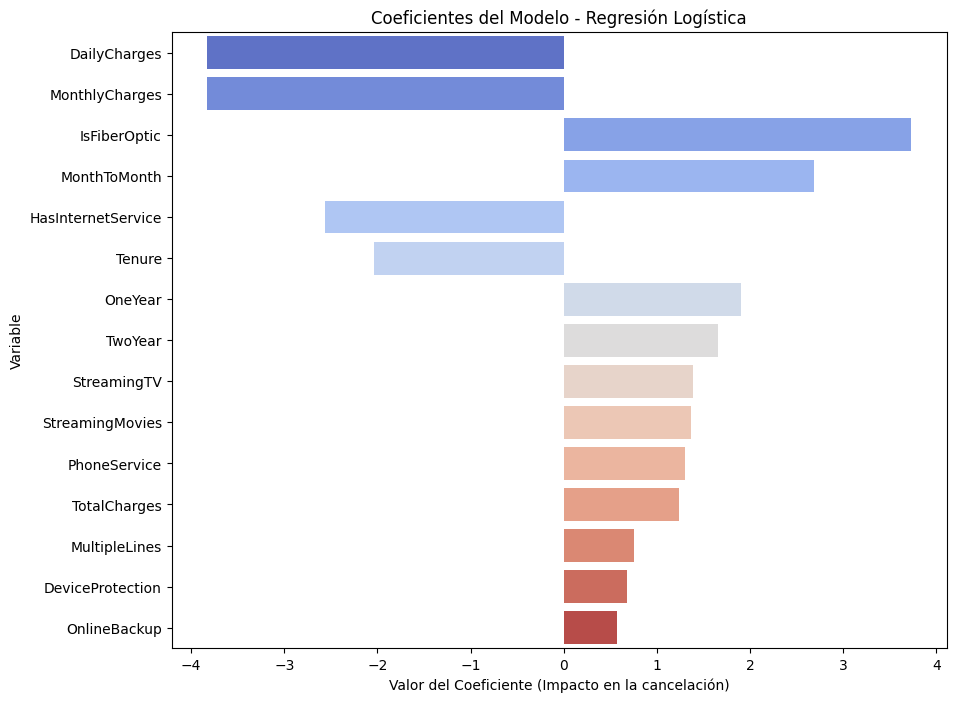

Top 10 variables más influyentes según Regresión Logística:
               Feature  Coefficient  Abs_Coefficient
4         DailyCharges    -3.831247         3.831247
2       MonthlyCharges    -3.831247         3.831247
13        IsFiberOptic     3.732700         3.732700
5         MonthToMonth     2.685796         2.685796
14  HasInternetService    -2.561798         2.561798
1               Tenure    -2.041960         2.041960
6              OneYear     1.903393         1.903393
7              TwoYear     1.652228         1.652228
19         StreamingTV     1.388288         1.388288
20     StreamingMovies     1.366104         1.366104


In [325]:
# Extraer los coeficientes del modelo entrenado (log_reg)
coefficients = log_reg.coef_[0]

# Crear un DataFrame para visualizar
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Añadir una columna con el valor absoluto para ordenar por importancia
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Visualizar los 15 coeficientes más influyentes
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df.head(15), palette='coolwarm')
plt.title('Coeficientes del Modelo - Regresión Logística')
plt.xlabel('Valor del Coeficiente (Impacto en la cancelación)')
plt.ylabel('Variable')
plt.show()

# Imprimir el top 10
print("Top 10 variables más influyentes según Regresión Logística:")
print(coeff_df.head(10))

Podemos observar que para el modelo de regresión logística, las 10 variables más importantes son

| Variable | Coeficiente | Coeficiente Absoluto |
|:---|:---|:---|
| DailyCharges | -3.831247 | 3.831247 |
| MonthlyCharges | -3.831247 | 3.831247 |
| IsFiberOptic | 3.732700 | 3.732700 |
| MonthToMonth | 2.685796 | 2.685796 |
| HasInternetService &nbsp; | -2.561798 | 2.561798 |
| Tenure | -2.041960 | 2.041960 |
| OneYear | 1.903393 | 1.903393 |
| TwoYear | 1.652228 | 1.652228 |
| StreamingTV | 1.388288 | 1.388288 |
| StreamingMovies | 1.366104 | 1.366104 |

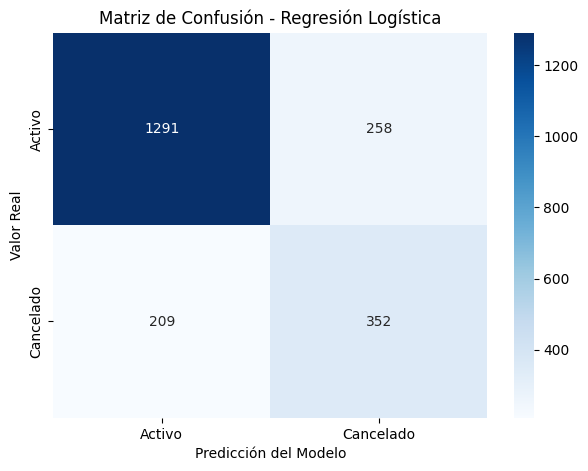

In [326]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Calcula la matriz de confusión
# (Usa y_test y las predicciones de tu modelo, en este caso y_pred_log_reg)
cm = confusion_matrix(y_test, y_pred_log_reg)

# 2. Define las etiquetas para los ejes
labels = ["Activo", "Cancelado"]

# 3. Crea la visualización del mapa de calor
plt.figure(figsize=(7, 5))
sns.heatmap(cm,
            annot=True,      # Muestra los números en cada celda
            fmt='d',         # Formatea los números como enteros
            cmap='Blues',    # Elige un mapa de color
            xticklabels=labels,
            yticklabels=labels)

# 4. Añade títulos y etiquetas para mayor claridad
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.show()

# ¿Qué Modelo es Mejor para el Negocio?
La elección depende del objetivo de la empresa:

Si el objetivo es "no dejar escapar a ningún cliente en riesgo": La Regresión Logística es mejor. Su alto Recall (76%) asegura que identificas a la gran mayoría de los clientes que planean irse, aunque esto implique contactar a algunos clientes felices por error (baja Precision).

Si el objetivo es "ser eficiente con los recursos de retención": El Random Forest podría ser preferible. Sus alertas son más fiables (68% de Precision), por lo que gastarás menos tiempo y dinero en clientes que no necesitaban ser contactados.

Para la mayoría de las campañas de retención, un alto Recall es prioritario, por lo que la Regresión Logística, a pesar de su menor accuracy, es el modelo más útil en este caso.

## **Informe Final: Análisis y Estrategias de Retención de Clientes**

### **1. Resumen Ejecutivo**

Este informe presenta los resultados del análisis predictivo sobre la cancelación de clientes (Churn) en el sector de las telecomunicaciones. Utilizando un conjunto de datos de clientes, se desarrollaron y evaluaron dos modelos de Machine Learning (Regresión Logística y Random Forest) para identificar los factores que más influyen en la decisión de un cliente de abandonar el servicio.

El análisis reveló que el **tipo de contrato, la antigüedad del cliente (Tenure) y el método de pago** son los predictores más fuertes de la cancelación. El modelo de **Regresión Logística** demostró ser el más eficaz para el objetivo de negocio, identificando correctamente al **76% de los clientes en riesgo de cancelación**. Basado en estos hallazgos, se proponen una serie de estrategias proactivas de retención enfocadas en la personalización de ofertas y la mejora de la experiencia del cliente.

### **2. Rendimiento y Selección del Modelo Predictivo**

Se entrenaron dos modelos con enfoques distintos para predecir la cancelación:

* **Regresión Logística:** Un modelo lineal que requiere estandarización de datos.
* **Random Forest:** Un modelo basado en árboles que no es sensible a la escala de los datos.

Aunque el **Random Forest** obtuvo una mayor precisión general (**81%** vs. 75%), el modelo de **Regresión Logística** fue superior en la métrica más crítica para este problema: el **Recall (Sensibilidad)**.

| Métrica Clave | Regresión Logística | Random Forest | Conclusión |
| :--- | :--- | :--- | :--- |
| **Recall (Churn=1)** | **76%** | 58% | La Regresión Logística identifica a una proporción mucho mayor de clientes que realmente van a cancelar. |
| **Precision (Churn=1)** | 52% | **68%** | El Random Forest es más certero cuando predice una cancelación, pero deja escapar a muchos clientes en riesgo. |
| **Accuracy General** | 75% | **81%** | La precisión global del Random Forest es mayor, pero puede ser engañosa debido al desbalance de clases. |

**Decisión del Modelo:** Para un objetivo de negocio enfocado en la **retención proactiva**, es preferible un modelo con alto **Recall**. Identificar al 76% de los clientes en riesgo (Regresión Logística) nos da la oportunidad de intervenir, incluso si eso significa contactar a algunos clientes que no planeaban irse. Por lo tanto, se selecciona la **Regresión Logística como el modelo principal** para guiar las estrategias.

### **3. Factores Principales que Afectan la Cancelación**

Ambos modelos, junto con el análisis exploratorio, coincidieron en los siguientes factores como los más influyentes en la cancelación de clientes:

#### **A. Factores Contractuales y de Antigüedad (Los más importantes)**

1.  **Tipo de Contrato (`MonthToMonth`):** Este es, por lejos, el factor más determinante. Los clientes con contratos mes a mes tienen una flexibilidad que facilita la cancelación y muestran la correlación positiva más alta con el churn.
2.  **Antigüedad (`Tenure`):** Existe una fuerte relación inversa. A mayor tiempo como cliente, menor es la probabilidad de cancelación. Los clientes nuevos son los más vulnerables.
3.  **Contratos a Largo Plazo (`OneYear`, `TwoYear`):** Estos tienen un fuerte efecto protector, reduciendo significativamente la probabilidad de cancelación.

#### **B. Factores Financieros y de Pago**

1.  **Método de Pago (`PaymentMethodElectronicCheck`):** Los clientes que utilizan cheques electrónicos como método de pago son considerablemente más propensos a cancelar.
2.  **Cargos Mensuales y Totales (`MonthlyCharges`, `TotalCharges`):** Aunque su impacto es moderado, cargos mensuales altos, especialmente en combinación con una baja antigüedad, se asocian a un mayor riesgo.
3.  **Facturación Electrónica (`PaperlessBilling`):** Los clientes con facturación sin papel muestran una ligera tendencia mayor a cancelar.

#### **C. Factores de Servicio**

1.  **Servicio de Internet (`IsFiberOptic`):** Los clientes con fibra óptica tienen una tasa de cancelación más alta. Esto podría indicar problemas con este servicio específico (costo, fiabilidad) o que atrae a un perfil de cliente más exigente.
2.  **Servicios de Soporte (`OnlineSecurity`, `TechSupport`):** La ausencia de servicios de valor añadido como seguridad online y soporte técnico está negativamente correlacionada con la cancelación, indicando que quienes los contratan tienden a ser clientes más leales.

### **4. Propuestas de Estrategias de Retención**

Basado en los factores identificados, se proponen las siguientes estrategias de retención:

**1. Programa de Fidelización para Clientes Nuevos:**
* **Acción:** Crear una campaña de "primeros 90 días" para clientes con baja antigüedad (`Tenure`), ofreciendo descuentos, contenido exclusivo o una revisión gratuita de su plan.
* **Justificación:** Atacar el período de mayor vulnerabilidad, donde se concentra la mayor tasa de cancelación.

**2. Incentivos para la Migración de Contratos:**
* **Acción:** Lanzar una oferta proactiva y personalizada para clientes con contrato `MonthToMonth`, mostrando los beneficios de ahorro y estabilidad de los planes de `OneYear` o `TwoYear`.
* **Justificación:** El tipo de contrato es el predictor más fuerte. Convertir a estos clientes a planes a largo plazo es la estrategia de retención más efectiva.

**3. Revisión del Método de Pago y Ofertas de Autopago:**
* **Acción:** Investigar por qué el pago con `ElectronicCheck` se correlaciona con el churn. Ofrecer descuentos o beneficios a los clientes que migren a métodos de pago automáticos, como tarjeta de crédito o débito bancario.
* **Justificación:** Reducir la fricción en los pagos y la dependencia de un método de pago de alto riesgo.

**4. Segmentación y Ofertas para Clientes de Fibra Óptica:**
* **Acción:** Realizar encuestas de satisfacción específicas para clientes con `IsFiberOptic`. Crear paquetes que incluyan servicios de valor añadido (como `TechSupport` o `OnlineSecurity`) a un precio reducido para este segmento.
* **Justificación:** Mitigar el riesgo en un segmento de clientes que, aunque valioso, muestra una alta tasa de cancelación.

¡Felicidades por completar este proyecto! Ha sido un placer trabajar contigo en este análisis.